In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train= pd.read_csv('train.csv', parse_dates=['issue_date','listing_date'])
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
test= pd.read_csv('test.csv', parse_dates=['issue_date','listing_date'])
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pet_id          18834 non-null  object        
 1   issue_date      18834 non-null  datetime64[ns]
 2   listing_date    18834 non-null  datetime64[ns]
 3   condition       17357 non-null  float64       
 4   color_type      18834 non-null  object        
 5   length(m)       18834 non-null  float64       
 6   height(cm)      18834 non-null  float64       
 7   X1              18834 non-null  int64         
 8   X2              18834 non-null  int64         
 9   breed_category  18834 non-null  float64       
 10  pet_category    18834 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 1.6+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pet_id        8072 non-null   object        
 1   issue_date    8072 non-null   datetime64[ns]
 2   listing_date  8072 non-null   datetime64[ns]
 3   condition     7453 non-null   float64       
 4   color_type    8072 non-null   object        
 5   length(m)     8072 non-null   float64       
 6   height(cm)    8072 non-null   float64       
 7   X1            8072 non-null   int64         
 8   X2            8072 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 567.7+ KB


In [7]:
train.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,17357.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.770434,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


In [8]:
test.describe()

,condition,length(m),height(cm),X1,X2
count,7453.000000,8072.000000,8072.000000,8072.000000,8072.000000
mean,0.886623,0.507265,27.451163,5.254336,4.505327
std,0.770950,0.289615,12.917903,6.505841,3.523568
min,0.000000,0.000000,5.010000,0.000000,0.000000
25%,0.000000,0.260000,16.277500,0.000000,1.000000
50%,1.000000,0.510000,27.410000,0.000000,4.000000
75%,1.000000,0.760000,38.480000,13.000000,9.000000
max,2.000000,1.000000,49.990000,18.000000,9.000000


In [9]:
pet_id= test[['pet_id']] # Dataset that contains only the id of the pet

In [10]:
train.drop('pet_id',axis=1,inplace=True)
test.drop('pet_id',axis=1,inplace=True)

In [11]:
train.head()

,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,2014-09-28,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,2016-12-31,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,2017-09-28,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [12]:
train.isnull().sum()

issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [13]:
test.isnull().sum()

issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

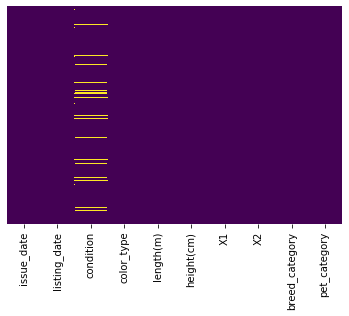

In [14]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False, yticklabels=False)

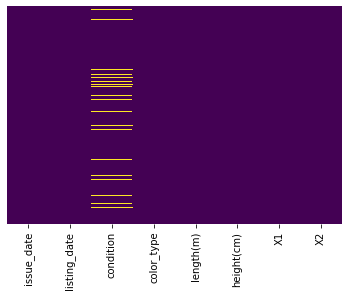

In [15]:
sns.heatmap(test.isnull(), cmap='viridis',cbar=False, yticklabels=False)

In [16]:
train.drop(['issue_date','listing_date'],axis=1,inplace=True)
test.drop(['issue_date','listing_date'],axis=1,inplace=True)

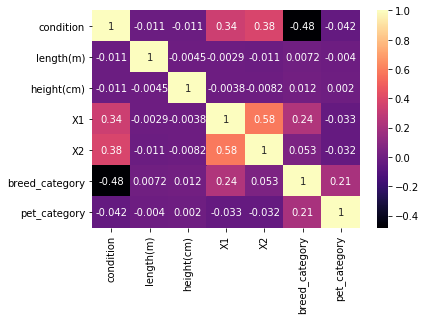

In [17]:
sns.heatmap(train.corr(),cmap='magma', annot=True)

# Treating the categorical features:
1. Training dataset

In [18]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [19]:
# Label Encoder for categorical values
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['label_enc_color']= le.fit_transform(train['color_type'])
train.head(2)

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,label_enc_color
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,18
1,1.0,White,0.72,14.19,13,9,0.0,2,53


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
enc= OneHotEncoder(handle_unknown='ignore')

# Passing label encoded value of 'color_type' column in the one-hot-encoder
enc_df_train= pd.DataFrame(enc.fit_transform(train[['label_enc_color']]).toarray())

# Merging it with original training dataset
train= train.join(enc_df_train)
train

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,label_enc_color,0,...,46,47,48,49,50,51,52,53,54,55
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,White,0.72,14.19,13,9,0.0,2,53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,Brown,0.15,40.90,15,4,2.0,4,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,White,0.62,17.82,0,1,0.0,2,53,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,Black,0.50,11.06,18,4,0.0,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0.0,2,52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18830,NaN,Brown,0.73,14.25,15,4,2.0,4,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18831,0.0,Calico Point,0.99,28.13,13,9,1.0,1,22,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18832,0.0,Tan,0.55,44.82,13,9,1.0,2,48,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Testing dataset

In [21]:
# Label Encoder for categorical values
test['label_enc_color']= le.fit_transform(test['color_type'])

from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
enc= OneHotEncoder(handle_unknown='ignore')

# Passing label encoded value of 'color_type' column in the one-hot-encoder
enc_df_test= pd.DataFrame(enc.fit_transform(test[['label_enc_color']]).toarray())

# Merging it with original training dataset
test= test.join(enc_df_test)
test

,condition,color_type,length(m),height(cm),X1,X2,label_enc_color,0,1,2,...,44,45,46,47,48,49,50,51,52,53
0,0.0,Black,0.87,42.73,0,7,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,Orange Tabby,0.06,6.71,0,1,36,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,Black,0.24,41.21,0,7,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,Black,0.29,8.46,7,1,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Brown,0.71,30.92,0,7,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8067,2.0,Brown,0.82,36.08,13,9,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8068,0.0,Tan,0.49,27.54,13,9,46,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8069,0.0,Black,0.98,37.19,0,7,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8070,NaN,Black,0.79,23.83,0,2,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dropping unnecessary features:
1. Teraining dataset

In [22]:
train.drop(['color_type','label_enc_color'], axis=1, inplace=True)
test.drop(['color_type','label_enc_color'], axis=1, inplace=True)

# Finding the missing values:
1. Training data

In [23]:
df1= train[['condition', 'length(m)','height(cm)','X1','X2']]
df1.head()

,condition,length(m),height(cm),X1,X2
0,2.0,0.80,7.78,13,9
1,1.0,0.72,14.19,13,9
2,NaN,0.15,40.90,15,4
3,1.0,0.62,17.82,0,1
4,2.0,0.50,11.06,18,4


In [24]:
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
df1_filled= imputer.fit_transform(df1)

In [25]:
df1_filled= pd.DataFrame(df1_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )
df1_filled

,condition,length(m),height(cm),X1,X2
0,2.0,0.80,7.78,13.0,9.0
1,1.0,0.72,14.19,13.0,9.0
2,1.4,0.15,40.90,15.0,4.0
3,1.0,0.62,17.82,0.0,1.0
4,2.0,0.50,11.06,18.0,4.0
...,...,...,...,...,...
18829,2.0,0.44,27.36,0.0,1.0
18830,1.6,0.73,14.25,15.0,4.0
18831,0.0,0.99,28.13,13.0,9.0
18832,0.0,0.55,44.82,13.0,9.0


In [26]:
train.drop('condition', axis=1, inplace=True)

In [27]:
train['condition']= df1_filled['condition']

In [28]:
train.head()

,length(m),height(cm),X1,X2,breed_category,pet_category,0,1,2,3,...,47,48,49,50,51,52,53,54,55,condition
0,0.80,7.78,13,9,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.72,14.19,13,9,0.0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.15,40.90,15,4,2.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
3,0.62,17.82,0,1,0.0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.50,11.06,18,4,0.0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


2. Testing data

In [29]:
df1= test[['condition', 'length(m)','height(cm)','X1','X2']]
df1_filled= imputer.fit_transform(df1)
df1_filled= pd.DataFrame(df1_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )

In [30]:
df1_filled.head()

,condition,length(m),height(cm),X1,X2
0,0.0,0.87,42.73,0.0,7.0
1,1.0,0.06,6.71,0.0,1.0
2,1.0,0.24,41.21,0.0,7.0
3,1.0,0.29,8.46,7.0,1.0
4,1.0,0.71,30.92,0.0,7.0


In [31]:
test.drop('condition', axis=1, inplace=True)
test['condition']= df1_filled['condition']

In [32]:
test.head()

,length(m),height(cm),X1,X2,0,1,2,3,4,5,...,45,46,47,48,49,50,51,52,53,condition
0,0.87,42.73,0,7,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.06,6.71,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.24,41.21,0,7,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.29,8.46,7,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.71,30.92,0,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
train.shape

(18834, 63)

In [34]:
test.shape

(8072, 59)

In [35]:
x1= train[['length(m)','height(cm)']]

In [36]:
train.drop(['length(m)', 'height(cm)'], axis=1, inplace=True)

# Separating features and labels in test data

In [37]:
y1=train['breed_category']
y2= train['pet_category']

In [38]:
breed=train[['breed_category']]

In [39]:
x=train.drop(['breed_category','pet_category'], axis=1)
x.head()

,X1,X2,0,1,2,3,4,5,6,7,...,47,48,49,50,51,52,53,54,55,condition
0,13,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,13,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,15,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,18,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


# Model Building

# 1. On training data

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest= train_test_split(x,y1, test_size=0.2, random_state= 42)

In [41]:
#from xgboost import XGBClassifier
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
rfor=RandomForestClassifier(random_state=101, max_depth=40, n_estimators=200 )
rfor.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [42]:
y_pr1= rfor.predict(xtest)

In [43]:
from sklearn.metrics import f1_score

In [44]:
s1= f1_score(ytest, y_pr1, average='weighted')

In [45]:
xtrain, xtest, ytrain,ytest= train_test_split(x,y2, test_size=0.2, random_state= 42)
rfor.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [46]:
y_pr2= rfor.predict(xtest)
s2= f1_score(ytest, y_pr2, average='weighted')

In [47]:
score= 100*((s1+s2)/2)
print("Score: ", score)

Score:  87.75550846621375


# 2. On testing data

In [48]:
rfor.fit(x,y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [49]:
ypred1= rfor.predict(test)

In [50]:
yp= pd.DataFrame(ypred1, columns=['breed_category'])

In [51]:
yp['breed_category'].value_counts()

1.0    3979
0.0    3630
2.0     463
Name: breed_category, dtype: int64

In [52]:
#x['height']= x1['height(cm)']
#test['breed']= yp['breed_category']

In [53]:
rfor.fit(x,y2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [54]:
ypred2= rfor.predict(test)
yp1= pd.DataFrame(ypred2, columns=['pet_category'])

In [55]:
yp1['pet_category'].value_counts()

2    6935
1    1131
4       4
0       2
Name: pet_category, dtype: int64

# Creation of Submission File

In [56]:
prediction= pd.DataFrame({'pet_id':pet_id['pet_id'],'breed_category':yp['breed_category'],'pet_category':yp1['pet_category']})
prediction.to_csv('Submission.csv',index=False)

In [57]:
sub=pd.read_csv('Submission.csv')
sub.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,2
4,ANSL_72871,0.0,2


In [58]:
sub.shape

(8072, 3)

# ------------------------------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------------------------

# Method-2

# Using multiclass instead of multilabel classification

In [83]:
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [84]:
df_train= pd.read_csv('train.csv',parse_dates=['issue_date','listing_date'])
df_test= pd.read_csv('test.csv',parse_dates=['issue_date','listing_date'])

In [85]:
df_train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2


In [86]:
df_test.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1


# Finding Missing values in 'condition' column

In [87]:
df1= df_train[['condition', 'length(m)','height(cm)','X1','X2']]
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
df1_filled= imputer.fit_transform(df1)

In [88]:
df1_filled= pd.DataFrame(df1_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )
#df1_filled

In [89]:
df_train.drop('condition', axis=1, inplace=True)

In [90]:
df_train['condition']= df1_filled['condition']
df_train.head()

,pet_id,issue_date,listing_date,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,condition
0,ANSL_69903,2016-07-10,2016-09-21 16:25:00,Brown Tabby,0.80,7.78,13,9,0.0,1,2.0
1,ANSL_66892,2013-11-21,2018-12-27 17:47:00,White,0.72,14.19,13,9,0.0,2,1.0
2,ANSL_69750,2014-09-28,2016-10-19 08:24:00,Brown,0.15,40.90,15,4,2.0,4,1.4
3,ANSL_71623,2016-12-31,2019-01-25 18:30:00,White,0.62,17.82,0,1,0.0,2,1.0
4,ANSL_57969,2017-09-28,2017-11-19 09:38:00,Black,0.50,11.06,18,4,0.0,1,2.0


In [91]:
df2= df_test[['condition', 'length(m)','height(cm)','X1','X2']]
imputer= KNNImputer(n_neighbors=5)
df2_filled= imputer.fit_transform(df2)

In [92]:
df2_filled= pd.DataFrame(df2_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )
df_test.drop('condition', axis=1, inplace=True)

In [93]:
df_test['condition']= df2_filled['condition']
df_test.head()

,pet_id,issue_date,listing_date,color_type,length(m),height(cm),X1,X2,condition
0,ANSL_75005,2005-08-17,2017-09-07 15:35:00,Black,0.87,42.73,0,7,0.0
1,ANSL_76663,2018-11-15,2019-05-08 17:24:00,Orange Tabby,0.06,6.71,0,1,1.0
2,ANSL_58259,2012-10-11,2018-04-02 16:51:00,Black,0.24,41.21,0,7,1.0
3,ANSL_67171,2015-02-13,2018-04-06 07:25:00,Black,0.29,8.46,7,1,1.0
4,ANSL_72871,2017-01-18,2018-04-26 13:42:00,Brown,0.71,30.92,0,7,1.0


1. Train dataset

In [94]:
# Combining both the target to make them as one!
df_train["target"] = df_train['breed_category'].astype(int).astype(str) + "_" + df_train['pet_category'].astype(str)

le = LabelEncoder()
df_train["target"] = le.fit_transform(df_train["target"])

le2 = LabelEncoder()
df_train["color_type"] = le2.fit_transform(df_train["color_type"])

# Extracting information from datetime column
df_train["issue_date"] = pd.to_datetime(df_train["issue_date"])
df_train["listing_date"] = pd.to_datetime(df_train["listing_date"])
df_train["issue_day"] = df_train["issue_date"].dt.day
df_train["issue_month"] = df_train["issue_date"].dt.month
df_train["issue_year"] = df_train["issue_date"].dt.year
df_train["listing_day"] = df_train["listing_date"].dt.day
df_train["listing_month"] = df_train["listing_date"].dt.month
df_train["listing_year"] = df_train["listing_date"].dt.year
df_train["days_old"] = np.abs(df_train["listing_date"] - df_train["issue_date"]).dt.days
df_train["area"] = df_train["length(m)"]*100*df_train["height(cm)"]

#df_train = df_train.fillna(3) # filling the null values with the new value.
df_train["condition"] = df_train["condition"].astype(int)

df_train = df_train.drop(["issue_date","listing_date","pet_id","breed_category","pet_category"],axis=1)

2. Testing data

In [95]:
df_test["color_type"] = le2.transform(df_test["color_type"])

test_pet_id = df_test["pet_id"]
df_test["issue_date"] = pd.to_datetime(df_test["issue_date"])
df_test["listing_date"] = pd.to_datetime(df_test["listing_date"])
df_test["issue_day"] = df_test["issue_date"].dt.day
df_test["issue_month"] = df_test["issue_date"].dt.month
df_test["issue_year"] = df_test["issue_date"].dt.year
df_test["listing_day"] = df_test["listing_date"].dt.day
df_test["listing_month"] = df_test["listing_date"].dt.month
df_test["listing_year"] = df_test["listing_date"].dt.year
df_test["days_old"] = np.abs(df_test["listing_date"] - df_test["issue_date"]).dt.days
df_test["area"] = df_test["length(m)"]*100*df_train["height(cm)"]


#df_test = df_test.fillna(3)
df_test["condition"] = df_test["condition"].astype(int)

df_test = df_test.drop(["issue_date","listing_date","pet_id"],axis=1)

In [96]:
df_test.isnull().sum()

color_type       0
length(m)        0
height(cm)       0
X1               0
X2               0
condition        0
issue_day        0
issue_month      0
issue_year       0
listing_day      0
listing_month    0
listing_year     0
days_old         0
area             0
dtype: int64

In [97]:
df_train.isnull().sum()

color_type       0
length(m)        0
height(cm)       0
X1               0
X2               0
condition        0
target           0
issue_day        0
issue_month      0
issue_year       0
listing_day      0
listing_month    0
listing_year     0
days_old         0
area             0
dtype: int64

In [98]:
df_train.head(5)

,color_type,length(m),height(cm),X1,X2,condition,target,issue_day,issue_month,issue_year,listing_day,listing_month,listing_year,days_old,area
0,18,0.80,7.78,13,9,2,1,10,7,2016,21,9,2016,73,622.40
1,53,0.72,14.19,13,9,1,2,21,11,2013,27,12,2018,1862,1021.68
2,15,0.15,40.90,15,4,1,11,28,9,2014,19,10,2016,752,613.50
3,53,0.62,17.82,0,1,1,2,31,12,2016,25,1,2019,755,1104.84
4,2,0.50,11.06,18,4,2,1,28,9,2017,19,11,2017,52,553.00


In [99]:
df_test.head(5)

,color_type,length(m),height(cm),X1,X2,condition,issue_day,issue_month,issue_year,listing_day,listing_month,listing_year,days_old,area
0,2,0.87,42.73,0,7,0,17,8,2005,7,9,2017,4404,676.86
1,38,0.06,6.71,0,1,1,15,11,2018,8,5,2019,174,85.14
2,2,0.24,41.21,0,7,1,11,10,2012,2,4,2018,1999,981.60
3,2,0.29,8.46,7,1,1,13,2,2015,6,4,2018,1148,516.78
4,15,0.71,30.92,0,7,1,18,1,2017,26,4,2018,463,785.26


# Extracting features and target

In [100]:
x = df_train.drop("target",axis=1)
y = df_train["target"]
cat_cols = ["condition","color_type"]

# Model Building:
1. LGBMClassifier and CatBoostingClassifier

In [101]:
cb = CatBoostClassifier(random_state = 27)
cb.fit(x,y,cat_features = cat_cols)

Learning rate set to 0.091906
0:	learn: 1.9380717	total: 280ms	remaining: 4m 40s
1:	learn: 1.6651045	total: 422ms	remaining: 3m 30s
2:	learn: 1.4794072	total: 567ms	remaining: 3m 8s
3:	learn: 1.3376723	total: 710ms	remaining: 2m 56s
4:	learn: 1.2242596	total: 840ms	remaining: 2m 47s
5:	learn: 1.1329327	total: 983ms	remaining: 2m 42s
6:	learn: 1.0600539	total: 1.12s	remaining: 2m 38s
7:	learn: 0.9981508	total: 1.25s	remaining: 2m 34s
8:	learn: 0.9435382	total: 1.39s	remaining: 2m 32s
9:	learn: 0.8980389	total: 1.53s	remaining: 2m 31s
10:	learn: 0.8593543	total: 1.65s	remaining: 2m 28s
11:	learn: 0.8255149	total: 1.8s	remaining: 2m 28s
12:	learn: 0.7939675	total: 1.94s	remaining: 2m 27s
13:	learn: 0.7675719	total: 2.06s	remaining: 2m 25s
14:	learn: 0.7440882	total: 2.19s	remaining: 2m 23s
15:	learn: 0.7216154	total: 2.31s	remaining: 2m 22s
16:	learn: 0.7027054	total: 2.43s	remaining: 2m 20s
17:	learn: 0.6853879	total: 2.57s	remaining: 2m 20s
18:	learn: 0.6704087	total: 2.7s	remaining: 2m

158:	learn: 0.4299827	total: 24.1s	remaining: 2m 7s
159:	learn: 0.4292736	total: 24.3s	remaining: 2m 7s
160:	learn: 0.4283970	total: 24.4s	remaining: 2m 7s
161:	learn: 0.4279777	total: 24.6s	remaining: 2m 7s
162:	learn: 0.4273552	total: 24.8s	remaining: 2m 7s
163:	learn: 0.4266444	total: 25s	remaining: 2m 7s
164:	learn: 0.4264558	total: 25.1s	remaining: 2m 7s
165:	learn: 0.4260373	total: 25.3s	remaining: 2m 7s
166:	learn: 0.4255786	total: 25.5s	remaining: 2m 7s
167:	learn: 0.4253825	total: 25.6s	remaining: 2m 7s
168:	learn: 0.4251278	total: 25.8s	remaining: 2m 6s
169:	learn: 0.4246315	total: 26s	remaining: 2m 6s
170:	learn: 0.4241189	total: 26.1s	remaining: 2m 6s
171:	learn: 0.4234225	total: 26.3s	remaining: 2m 6s
172:	learn: 0.4230945	total: 26.4s	remaining: 2m 6s
173:	learn: 0.4223752	total: 26.6s	remaining: 2m 6s
174:	learn: 0.4220701	total: 26.8s	remaining: 2m 6s
175:	learn: 0.4218112	total: 27s	remaining: 2m 6s
176:	learn: 0.4213754	total: 27.1s	remaining: 2m 6s
177:	learn: 0.4208

316:	learn: 0.3757994	total: 51.6s	remaining: 1m 51s
317:	learn: 0.3755879	total: 51.8s	remaining: 1m 51s
318:	learn: 0.3753743	total: 51.9s	remaining: 1m 50s
319:	learn: 0.3752716	total: 52.1s	remaining: 1m 50s
320:	learn: 0.3751414	total: 52.3s	remaining: 1m 50s
321:	learn: 0.3750474	total: 52.5s	remaining: 1m 50s
322:	learn: 0.3747192	total: 52.6s	remaining: 1m 50s
323:	learn: 0.3744267	total: 52.8s	remaining: 1m 50s
324:	learn: 0.3742345	total: 52.9s	remaining: 1m 49s
325:	learn: 0.3738233	total: 53.1s	remaining: 1m 49s
326:	learn: 0.3735843	total: 53.3s	remaining: 1m 49s
327:	learn: 0.3733650	total: 53.4s	remaining: 1m 49s
328:	learn: 0.3729292	total: 53.6s	remaining: 1m 49s
329:	learn: 0.3727063	total: 53.8s	remaining: 1m 49s
330:	learn: 0.3726063	total: 53.9s	remaining: 1m 49s
331:	learn: 0.3724667	total: 54.1s	remaining: 1m 48s
332:	learn: 0.3720796	total: 54.3s	remaining: 1m 48s
333:	learn: 0.3718554	total: 54.5s	remaining: 1m 48s
334:	learn: 0.3715746	total: 54.7s	remaining: 

472:	learn: 0.3348949	total: 1m 19s	remaining: 1m 28s
473:	learn: 0.3346000	total: 1m 19s	remaining: 1m 28s
474:	learn: 0.3341054	total: 1m 19s	remaining: 1m 28s
475:	learn: 0.3337535	total: 1m 20s	remaining: 1m 28s
476:	learn: 0.3335699	total: 1m 20s	remaining: 1m 27s
477:	learn: 0.3334874	total: 1m 20s	remaining: 1m 27s
478:	learn: 0.3332111	total: 1m 20s	remaining: 1m 27s
479:	learn: 0.3330485	total: 1m 20s	remaining: 1m 27s
480:	learn: 0.3326746	total: 1m 20s	remaining: 1m 27s
481:	learn: 0.3324545	total: 1m 21s	remaining: 1m 27s
482:	learn: 0.3322391	total: 1m 21s	remaining: 1m 27s
483:	learn: 0.3319659	total: 1m 21s	remaining: 1m 26s
484:	learn: 0.3314983	total: 1m 21s	remaining: 1m 26s
485:	learn: 0.3313143	total: 1m 21s	remaining: 1m 26s
486:	learn: 0.3310275	total: 1m 22s	remaining: 1m 26s
487:	learn: 0.3306970	total: 1m 22s	remaining: 1m 26s
488:	learn: 0.3304179	total: 1m 22s	remaining: 1m 26s
489:	learn: 0.3301960	total: 1m 22s	remaining: 1m 26s
490:	learn: 0.3299070	total:

626:	learn: 0.2990293	total: 1m 47s	remaining: 1m 4s
627:	learn: 0.2988015	total: 1m 48s	remaining: 1m 4s
628:	learn: 0.2987280	total: 1m 48s	remaining: 1m 3s
629:	learn: 0.2985963	total: 1m 48s	remaining: 1m 3s
630:	learn: 0.2984706	total: 1m 48s	remaining: 1m 3s
631:	learn: 0.2983164	total: 1m 48s	remaining: 1m 3s
632:	learn: 0.2980208	total: 1m 48s	remaining: 1m 3s
633:	learn: 0.2977748	total: 1m 49s	remaining: 1m 2s
634:	learn: 0.2975402	total: 1m 49s	remaining: 1m 2s
635:	learn: 0.2973600	total: 1m 49s	remaining: 1m 2s
636:	learn: 0.2970508	total: 1m 49s	remaining: 1m 2s
637:	learn: 0.2969540	total: 1m 49s	remaining: 1m 2s
638:	learn: 0.2965305	total: 1m 50s	remaining: 1m 2s
639:	learn: 0.2963494	total: 1m 50s	remaining: 1m 2s
640:	learn: 0.2962561	total: 1m 50s	remaining: 1m 1s
641:	learn: 0.2960177	total: 1m 50s	remaining: 1m 1s
642:	learn: 0.2957748	total: 1m 50s	remaining: 1m 1s
643:	learn: 0.2956570	total: 1m 51s	remaining: 1m 1s
644:	learn: 0.2954920	total: 1m 51s	remaining:

784:	learn: 0.2669408	total: 2m 16s	remaining: 37.5s
785:	learn: 0.2668062	total: 2m 16s	remaining: 37.3s
786:	learn: 0.2667615	total: 2m 17s	remaining: 37.1s
787:	learn: 0.2665173	total: 2m 17s	remaining: 36.9s
788:	learn: 0.2663745	total: 2m 17s	remaining: 36.8s
789:	learn: 0.2662546	total: 2m 17s	remaining: 36.6s
790:	learn: 0.2660160	total: 2m 17s	remaining: 36.4s
791:	learn: 0.2658253	total: 2m 17s	remaining: 36.2s
792:	learn: 0.2656053	total: 2m 18s	remaining: 36.1s
793:	learn: 0.2654752	total: 2m 18s	remaining: 35.9s
794:	learn: 0.2653125	total: 2m 18s	remaining: 35.7s
795:	learn: 0.2649589	total: 2m 18s	remaining: 35.5s
796:	learn: 0.2647325	total: 2m 18s	remaining: 35.4s
797:	learn: 0.2644663	total: 2m 19s	remaining: 35.2s
798:	learn: 0.2643433	total: 2m 19s	remaining: 35s
799:	learn: 0.2642411	total: 2m 19s	remaining: 34.8s
800:	learn: 0.2641219	total: 2m 19s	remaining: 34.7s
801:	learn: 0.2638578	total: 2m 19s	remaining: 34.5s
802:	learn: 0.2637776	total: 2m 19s	remaining: 3

941:	learn: 0.2409868	total: 2m 45s	remaining: 10.2s
942:	learn: 0.2408547	total: 2m 45s	remaining: 10s
943:	learn: 0.2406914	total: 2m 45s	remaining: 9.84s
944:	learn: 0.2405003	total: 2m 46s	remaining: 9.67s
945:	learn: 0.2403821	total: 2m 46s	remaining: 9.5s
946:	learn: 0.2401696	total: 2m 46s	remaining: 9.32s
947:	learn: 0.2400341	total: 2m 46s	remaining: 9.15s
948:	learn: 0.2397470	total: 2m 46s	remaining: 8.97s
949:	learn: 0.2396530	total: 2m 47s	remaining: 8.8s
950:	learn: 0.2394912	total: 2m 47s	remaining: 8.62s
951:	learn: 0.2393309	total: 2m 47s	remaining: 8.45s
952:	learn: 0.2391899	total: 2m 47s	remaining: 8.27s
953:	learn: 0.2389158	total: 2m 47s	remaining: 8.1s
954:	learn: 0.2387299	total: 2m 48s	remaining: 7.92s
955:	learn: 0.2385120	total: 2m 48s	remaining: 7.75s
956:	learn: 0.2382983	total: 2m 48s	remaining: 7.57s
957:	learn: 0.2382114	total: 2m 48s	remaining: 7.4s
958:	learn: 0.2380650	total: 2m 48s	remaining: 7.22s
959:	learn: 0.2379784	total: 2m 49s	remaining: 7.05s

In [102]:
lgb =LGBMClassifier(random_state=27,max_depth=18)
lgb.fit(x,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=18,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [103]:
preds = lgb.predict(df_test)
df2 = pd.DataFrame(test_pet_id.values,columns = ["pet_id"])
df2["target"] = preds
df2["target"] = le.inverse_transform(df2["target"])
df2[['breed_category','pet_category']] = df2.target.str.split("_",expand=True)
df2.drop("target",axis=1,inplace = True)

In [104]:
df2.head(5)

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2


In [105]:
df_test["breed_category"] = df2["breed_category"]

In [106]:
df_test= df_test.drop('breed_category', axis=1)
proba1 = lgb.predict_proba(df_test)
proba2 = cb.predict_proba(df_test)

In [107]:
final_proba = proba1*0.6 +proba2*0.4
preds = [np.argmax(i) for i in final_proba]

In [108]:
op = pd.DataFrame(test_pet_id.values,columns = ["pet_id"])
op["target"] = preds
op["target"] = le.inverse_transform(op["target"])
op[['breed_category','pet_category']] = op.target.str.split("_",expand=True)
op.drop("target",axis=1,inplace = True)

In [109]:
op.to_csv("Submission1_method_2.csv",index=False)
df= pd.read_csv('Submission1_method_2.csv')
df.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2


# Model Building:
2. VotingClassifier on XGBClassifier and CatBoostingClassifier
3. VotingClassifier on GridSearchCV and RandomizedSearchCV with random Forest as estimator

In [134]:
df_train= pd.read_csv('train.csv',parse_dates=['issue_date','listing_date'])
df_test= pd.read_csv('test.csv',parse_dates=['issue_date','listing_date'])

In [135]:
## Finging missing values

# Training data
df1= df_train[['condition', 'length(m)','height(cm)','X1','X2']]
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=6)
df1_filled= imputer.fit_transform(df1)
df1_filled= pd.DataFrame(df1_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )

df_train.drop('condition', axis=1, inplace=True)

In [136]:
df_train['condition']= df1_filled['condition']

In [137]:
## Test data
df2= df_test[['condition', 'length(m)','height(cm)','X1','X2']]
imputer= KNNImputer(n_neighbors=6)
df2_filled= imputer.fit_transform(df2)
df2_filled= pd.DataFrame(df2_filled, columns=['condition','length(m)', 'height(cm)','X1', "X2"] )

df_test.drop('condition', axis=1, inplace=True)

In [138]:
df_test['condition']= df2_filled['condition']

In [139]:
## Training data
# Combining both the target to make them as one!
df_train["target"] = df_train['breed_category'].astype(int).astype(str) + "_" + df_train['pet_category'].astype(str)

le = LabelEncoder()
df_train["target"] = le.fit_transform(df_train["target"])

le2 = LabelEncoder()
df_train["color_type"] = le2.fit_transform(df_train["color_type"])

# Extracting information from datetime column
df_train["issue_date"] = pd.to_datetime(df_train["issue_date"])
df_train["listing_date"] = pd.to_datetime(df_train["listing_date"])
df_train["issue_day"] = df_train["issue_date"].dt.day
df_train["issue_month"] = df_train["issue_date"].dt.month
df_train["issue_year"] = df_train["issue_date"].dt.year
df_train["listing_day"] = df_train["listing_date"].dt.day
df_train["listing_month"] = df_train["listing_date"].dt.month
df_train["listing_year"] = df_train["listing_date"].dt.year
df_train["days_old"] = np.abs(df_train["listing_date"] - df_train["issue_date"]).dt.days
df_train["area"] = df_train["length(m)"]*100*df_train["height(cm)"]

#df_train = df_train.fillna(3) # filling the null values with the new value.
df_train["condition"] = df_train["condition"].astype(int)

df_train = df_train.drop(["issue_date","listing_date","pet_id","breed_category","pet_category"],axis=1)

##-----------------------------------Test data------------------------------------------------

df_test["color_type"] = le2.transform(df_test["color_type"])

test_pet_id = df_test["pet_id"]
df_test["issue_date"] = pd.to_datetime(df_test["issue_date"])
df_test["listing_date"] = pd.to_datetime(df_test["listing_date"])
df_test["issue_day"] = df_test["issue_date"].dt.day
df_test["issue_month"] = df_test["issue_date"].dt.month
df_test["issue_year"] = df_test["issue_date"].dt.year
df_test["listing_day"] = df_test["listing_date"].dt.day
df_test["listing_month"] = df_test["listing_date"].dt.month
df_test["listing_year"] = df_test["listing_date"].dt.year
df_test["days_old"] = np.abs(df_test["listing_date"] - df_test["issue_date"]).dt.days
df_test["area"] = df_test["length(m)"]*100*df_train["height(cm)"]


#df_test = df_test.fillna(3)
df_test["condition"] = df_test["condition"].astype(int)

df_test = df_test.drop(["issue_date","listing_date","pet_id"],axis=1)

In [140]:
x = df_train.drop("target",axis=1)
y = df_train["target"]
cat_cols = ["condition","color_type"]

In [146]:
rfor= RandomForestClassifier(n_estimators=200, max_depth=25, random_state=27)
param_grid={ 'n_estimators':[300,900], 'max_features':['auto','sqrt','log2']}

In [152]:
vc= VotingClassifier(estimators=[('xgb', XGBClassifier(random_state=42, max_depth=8, n_estimators=1000, min_child_weight=3,
                                                      objective='softprob')),
                                ('cat', CatBoostClassifier(random_state=42,cat_features = cat_cols))],n_jobs=-1)
                                #('gscv', GridSearchCV(estimator=rfor, n_jobs=-1, param_grid=param_grid))], n_jobs=-1)

In [153]:
vc.fit(x,y)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=8, min_child_weight=3,
                                            missing=None, n_estimators=1000,
                                            n_jobs=1, nthread=None,
                                            objective='softprob',
                                            random_state=42, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1)),
                      

In [154]:
op = pd.DataFrame(test_pet_id.values,columns = ["pet_id"])
op["target"] = preds
op["target"] = le.inverse_transform(op["target"])
op[['breed_category','pet_category']] = op.target.str.split("_",expand=True)
op.drop("target",axis=1,inplace = True)

In [155]:
op.to_csv("Submission2_method_2.csv",index=False)
df= pd.read_csv('Submission2_method_2.csv')
df.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2
